In [1]:
## IMPORT THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.signal import medfilt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [2]:
## IMPORT AND READ THE TEXT FILES

fist_dataset = pd.read_table("C:\\Users\\husai\\OneDrive\\Documents\\UCL NOTES\\3RD YEAR RESEARCH PROJECT\\DATA COLLECTION\\EMG DATA\\GESTURE DATA\\FIST EMG DATA.txt")
four_fex_dataset = pd.read_table("C:\\Users\\husai\\OneDrive\\Documents\\UCL NOTES\\3RD YEAR RESEARCH PROJECT\\DATA COLLECTION\\EMG DATA\\GESTURE DATA\\4FEX EMG DATA.txt")
kgr_dataset = pd.read_table("C:\\Users\\husai\\OneDrive\\Documents\\UCL NOTES\\3RD YEAR RESEARCH PROJECT\\DATA COLLECTION\\EMG DATA\\GESTURE DATA\\KGR EMG DATA.txt")
rock_dataset = pd.read_table("C:\\Users\\husai\\OneDrive\\Documents\\UCL NOTES\\3RD YEAR RESEARCH PROJECT\\DATA COLLECTION\\EMG DATA\\GESTURE DATA\\ROCK SIGN EMG DATA.txt")
rest_dataset = pd.read_table("C:\\Users\\husai\\OneDrive\\Documents\\UCL NOTES\\3RD YEAR RESEARCH PROJECT\\DATA COLLECTION\\EMG DATA\\GESTURE DATA\\REST EMG DATA.txt")

In [3]:
# EXTRACT THE EMG DATA FROM TEXT FILES AND ASSIGN INTO A VARIABLE

fist_data = fist_dataset['431']
four_fex_data = four_fex_dataset['422']
kgr_data = kgr_dataset['462']
rock_data = rock_dataset['428']
rest_data = rest_dataset['466']

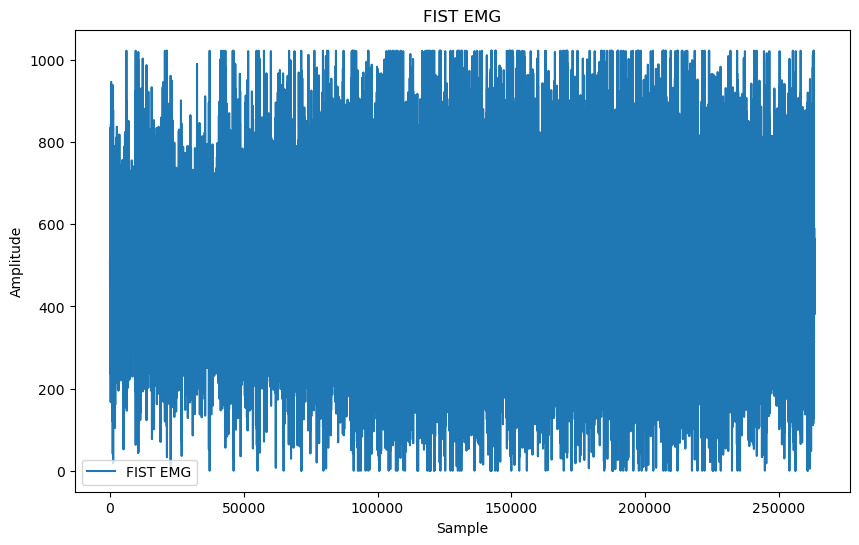

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(four_fex_data, label='FIST EMG')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('FIST EMG')
plt.legend()
plt.show()

In [4]:
## DEFINE THE FUNCTIONS & FORMULA FOR PREPROCESSING & FEATURE EXTRACTION

## REAL TIME PREPROCESSING AND FEATURE EXTRACTION

def extract_features_and_store(data):
    # Preprocessing steps
    zero_centered = data - np.mean(data)
    rectified = np.abs(zero_centered)
    squared = rectified ** 2
    window_size = 100
    moving_avg = np.convolve(squared, np.ones(window_size)/window_size, mode='valid')
    normalized = (data- np.mean(data))/(np.max(data) - np.min(data))
    
    # Feature Extraction
    iemg = np.trapz(rectified)
    mav = np.mean(np.abs(data))
    ssi = np.sum(data ** 2)
    rms = np.sqrt(np.mean(data ** 2))
    var = np.var(data)
    wl = np.sum(np.abs(np.diff(data)))
    zcr = np.sum(np.diff(np.sign(data)) != 0)
    
    print("IEMG = ",iemg)
    print("MAV = ",mav)
    print("SSI = ",ssi)
    print("RMS = ",rms)
    print("VAR = ",var)
    print("WL = ",wl)
    print("ZCR = ",zcr)
    
    return iemg,mav,ssi,rms,var,wl,zcr

In [5]:
fist_features = extract_features_and_store(fist_data)

IEMG =  15502796.375194794
MAV =  467.11440563509046
SSI =  54825501807
RMS =  477.3225039055247
VAR =  9640.904782816386
WL =  17040014
ZCR =  390


In [6]:
four_fex_features = extract_features_and_store(four_fex_data)

IEMG =  16908513.42623632
MAV =  467.24324355113714
SSI =  59969476913
RMS =  477.20599412012683
VAR =  9409.312179990724
WL =  25990397
ZCR =  172


In [7]:
kgr_features = extract_features_and_store(kgr_data)

IEMG =  7287350.232014738
MAV =  467.25980573624554
SSI =  49988916210
RMS =  469.36635630306273
VAR =  1973.050372539672
WL =  9997921
ZCR =  0


In [8]:
rock_features = extract_features_and_store(rock_data)

IEMG =  11874135.76498337
MAV =  467.1943442987566
SSI =  52524773703
RMS =  471.7204370629566
VAR =  4249.61539812184
WL =  11995875
ZCR =  4


In [11]:
rest_features = extract_features_and_store(rest_data)

IEMG =  5728583.807965078
MAV =  467.41600339185567
SSI =  45550842836
RMS =  468.4686815638777
VAR =  985.1853793824476
WL =  3916081
ZCR =  4


In [9]:
import numpy as np

# Function to extract features at fixed intervals
def extract_features_at_intervals(emg_data, window_size, step_size):
    num_samples = len(emg_data)
    features = []
    start_index = 0
    
    while start_index + window_size <= num_samples:
        # Get a window of EMG data
        emg_window = emg_data[start_index:start_index+window_size]
        
        # Extract features from the window
        iemg_window = np.sum(np.abs(emg_window))
        ssi_window = np.sum(np.square(emg_window))
        wl_window = np.sum(np.abs(np.diff(emg_window)))
        zcr_window = np.sum(np.diff(np.sign(emg_window)) != 0)
        mav_window = np.mean(np.abs(emg_window))
        rms_window = np.sqrt(np.mean(emg_window ** 2))
        var_window = np.var(emg_window)
        
        # Add features to the list
        features.append([iemg_window, ssi_window, wl_window, zcr_window,mav_window,rms_window,var_window])
        
        # Move to the next window
        start_index += step_size
    
    return np.array(features)

# Parameters for feature extraction
window_size = 440  # Adjust window size as needed
step_size = 50     # Adjust step size as needed

# Example EMG data (replace this with your actual EMG data)
#emg_data = np.random.rand(10000)

# Extract features at fixed intervals
extracted_features = extract_features_at_intervals(fist_data, window_size, step_size)

print("Extracted features shape:", extracted_features.shape)

Extracted features shape: (4804, 7)


In [11]:
import numpy as np

# Function to extract features at fixed intervals for all gestures
def extract_features_all_gestures(gestures_data, window_size, step_size):
    all_features = []
    
    for gesture_data in gestures_data:
        gesture_features = extract_features_at_intervals(gesture_data, window_size, step_size)
        all_features.append(gesture_features)
    
    return all_features

# Parameters for feature extraction
window_size = 440  # Adjust window size as needed
step_size = 10     # Adjust step size as needed

# Example EMG data for each gesture (replace with your actual data)
gestures_data = [fist_data, four_fex_data, kgr_data, rock_data, rest_data]

# Extract features at fixed intervals for all gestures
all_features = extract_features_all_gestures(gestures_data, window_size, step_size)

# Print shape of extracted features for each gesture
for i, gesture_features in enumerate(all_features):
    print(f"Gesture {i+1} features shape:", gesture_features.shape)

Gesture 1 features shape: (24020, 7)
Gesture 2 features shape: (26291, 7)
Gesture 3 features shape: (22647, 7)
Gesture 4 features shape: (23561, 7)
Gesture 5 features shape: (20712, 7)


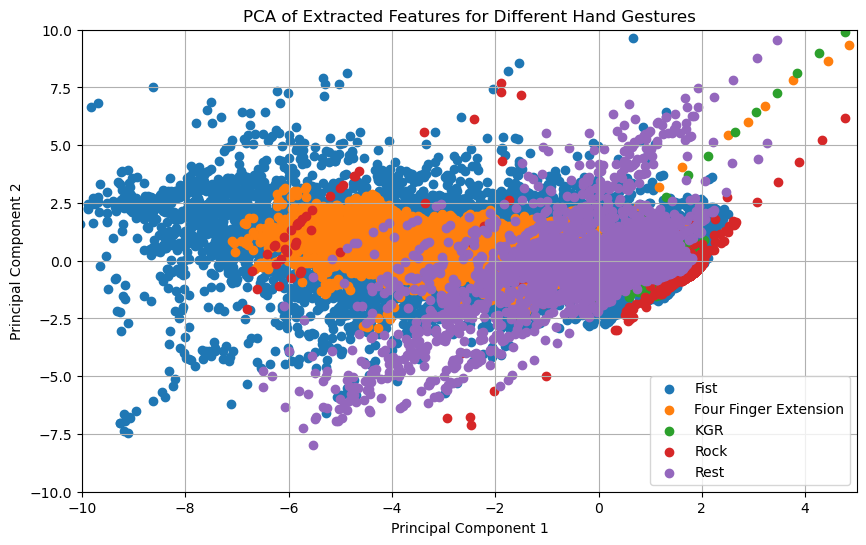

In [15]:
def extract_features(emg_data):
    iemg = np.trapz(np.abs(emg_data))
    mav = np.mean(np.abs(emg_data))
    ssi = np.sum(emg_data ** 2)
    rms = np.sqrt(np.mean(emg_data ** 2))
    var = np.var(emg_data)
    wl = np.sum(np.abs(np.diff(emg_data)))
    zcr = np.sum(np.diff(np.sign(emg_data)) != 0)
    return [iemg, mav, ssi, rms, var, wl, zcr]

# Assuming you have the EMG data for each gesture: fist_data, four_fex_data, kgr_data, rest_data, rock_data

# Extract features for each gesture
fist_features = np.array([extract_features(fist_data[i:i+window_size]) for i in range(0, len(fist_data), step_size)])
four_fex_features = np.array([extract_features(four_fex_data[i:i+window_size]) for i in range(0, len(four_fex_data), step_size)])
kgr_features = np.array([extract_features(kgr_data[i:i+window_size]) for i in range(0, len(kgr_data), step_size)])
rest_features = np.array([extract_features(rest_data[i:i+window_size]) for i in range(0, len(rest_data), step_size)])
rock_features = np.array([extract_features(rock_data[i:i+window_size]) for i in range(0, len(rock_data), step_size)])

# Stack all the features vertically
all_features = np.vstack((fist_features, four_fex_features, kgr_features, rest_features, rock_features))

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(all_features)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_features)

# Create a DataFrame for easier manipulation and plotting
df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add a column to indicate the gesture type
gesture_labels = ['Fist'] * len(fist_features) + ['Four Finger Extension'] * len(four_fex_features) + ['KGR'] * len(kgr_features) + ['Rock'] * len(rock_features) + ['Rest'] * len(rest_features)
df['Gesture'] = gesture_labels

# Define colors for each gesture
gesture_colors = {
    'Fist': 'blue',
    'Four Finger Extension': 'yellow',
    'KGR': 'green',
    'Rock': 'red',
    'Rest': 'purple'
}

# Plot the PCA results
plt.figure(figsize=(10, 6))
for gesture in ['Fist', 'Four Finger Extension', 'KGR','Rock', 'Rest',]:
    plt.scatter(df.loc[df['Gesture'] == gesture, 'PC1'], df.loc[df['Gesture'] == gesture, 'PC2'], label=gesture)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Extracted Features for Different Hand Gestures')
plt.legend()

# Set the axis limits for PC1 and PC2
plt.xlim(-10, 5)
plt.ylim(-10, 10)

plt.grid(True)
plt.show()



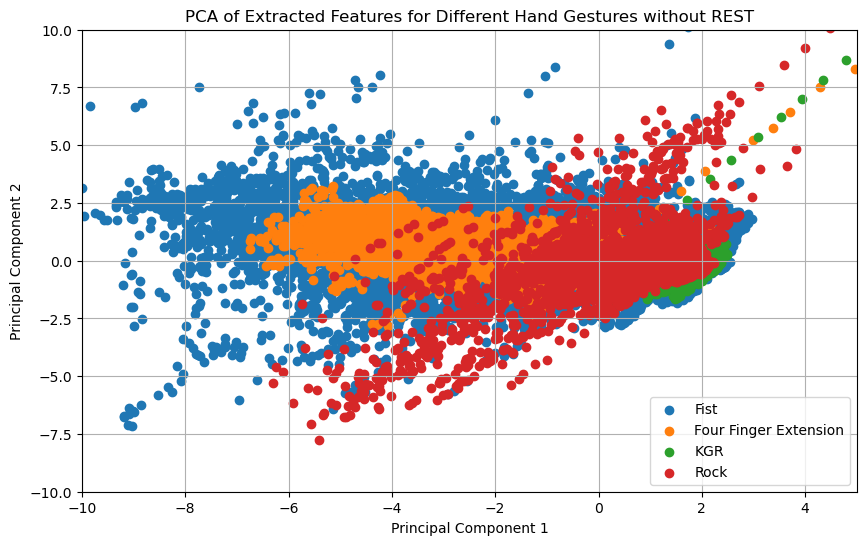

In [17]:
def extract_features(emg_data):
    iemg = np.trapz(np.abs(emg_data))
    mav = np.mean(np.abs(emg_data))
    ssi = np.sum(emg_data ** 2)
    rms = np.sqrt(np.mean(emg_data ** 2))
    var = np.var(emg_data)
    wl = np.sum(np.abs(np.diff(emg_data)))
    zcr = np.sum(np.diff(np.sign(emg_data)) != 0)
    return [iemg, mav, ssi, rms, var, wl, zcr]

# Assuming you have the EMG data for each gesture: fist_data, four_fex_data, kgr_data, rest_data, rock_data

# Extract features for each gesture
fist_features = np.array([extract_features(fist_data[i:i+window_size]) for i in range(0, len(fist_data), step_size)])
four_fex_features = np.array([extract_features(four_fex_data[i:i+window_size]) for i in range(0, len(four_fex_data), step_size)])
kgr_features = np.array([extract_features(kgr_data[i:i+window_size]) for i in range(0, len(kgr_data), step_size)])
#rest_features = np.array([extract_features(rest_data[i:i+window_size]) for i in range(0, len(rest_data), step_size)])
rock_features = np.array([extract_features(rock_data[i:i+window_size]) for i in range(0, len(rock_data), step_size)])

# Stack all the features vertically
all_features = np.vstack((fist_features, four_fex_features, kgr_features,rock_features))

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(all_features)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_features)

# Create a DataFrame for easier manipulation and plotting
df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add a column to indicate the gesture type
gesture_labels = ['Fist'] * len(fist_features) + ['Four Finger Extension'] * len(four_fex_features) + ['KGR'] * len(kgr_features) + ['Rock'] * len(rock_features)
df['Gesture'] = gesture_labels

# Define colors for each gesture
gesture_colors = {
    'Fist': 'blue',
    'Four Finger Extension': 'yellow',
    'KGR': 'green',
    'Rock': 'red',
}

# Plot the PCA results
plt.figure(figsize=(10, 6))
for gesture in ['Fist', 'Four Finger Extension', 'KGR','Rock']:
    plt.scatter(df.loc[df['Gesture'] == gesture, 'PC1'], df.loc[df['Gesture'] == gesture, 'PC2'], label=gesture)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Extracted Features for Different Hand Gestures without REST')
plt.legend()

# Set the axis limits for PC1 and PC2
plt.xlim(-10, 5)
plt.ylim(-10, 10)

plt.grid(True)
plt.show()

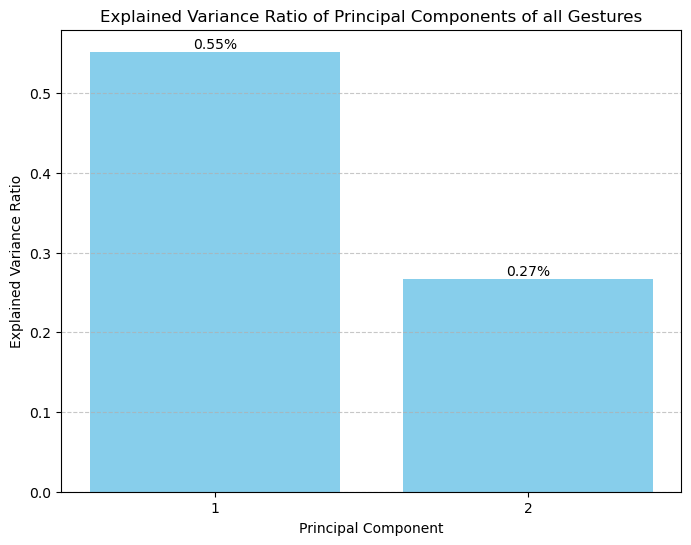

In [17]:
# Get explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Plot the explained variance ratios in a bar chart with percentage labels
plt.figure(figsize=(8, 6))
bars = plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components of all Gestures')

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

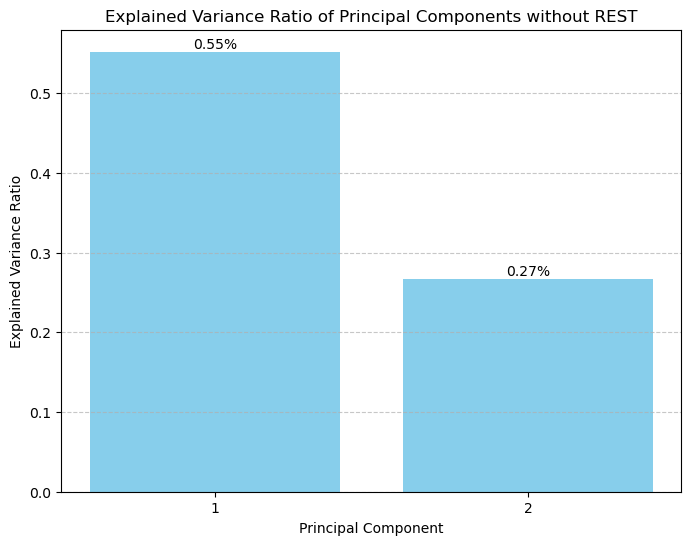

In [19]:
# Get explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Plot the explained variance ratios in a bar chart with percentage labels
plt.figure(figsize=(8, 6))
bars = plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components without REST')

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()